<a href="https://colab.research.google.com/github/Jamshaid9291/Music-Genre-Classification-using-PyTorch/blob/main/DL_Tabular_3_sec_dataset_2nd_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('features_3_sec.csv')

# Print shape and column names
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# Display 5 random samples
print("\nRandom Samples:")
print(df.sample(5))


Dataset shape: (9990, 60)

Columns:
 ['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']

Random Samples:
                 filename  le

In [ ]:

import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



# Shuffle dataset (optional but good practice)
df = shuffle(df, random_state=42).reset_index(drop=True)

# Display shape and column info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# --- STEP 1: Drop unnecessary columns if any (like filename) ---
if 'filename' in df.columns:
    df = df.drop('filename', axis=1)

# --- STEP 2: Separate features and labels ---
X = df.drop('label', axis=1)  # assuming 'label' is the genre column
y = df['label']

# --- STEP 3: Encode labels to numeric values ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # genres will become integers 0–9

# --- STEP 4: Feature scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- STEP 5: Train/Test Split (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Confirm shapes
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Encoded genre labels: {np.unique(y_encoded)}")
print(f"Label classes: {le.classes_}")


Shape: (9990, 60)
Columns: ['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']

Train set: (7992, 58), Test set: (1998, 58)
Encoded gen


Training XGBoost...

📊 XGBoost Accuracy: 0.8688688688688688

📊 : 0.8688688688688688

Training Random Forest incrementally...


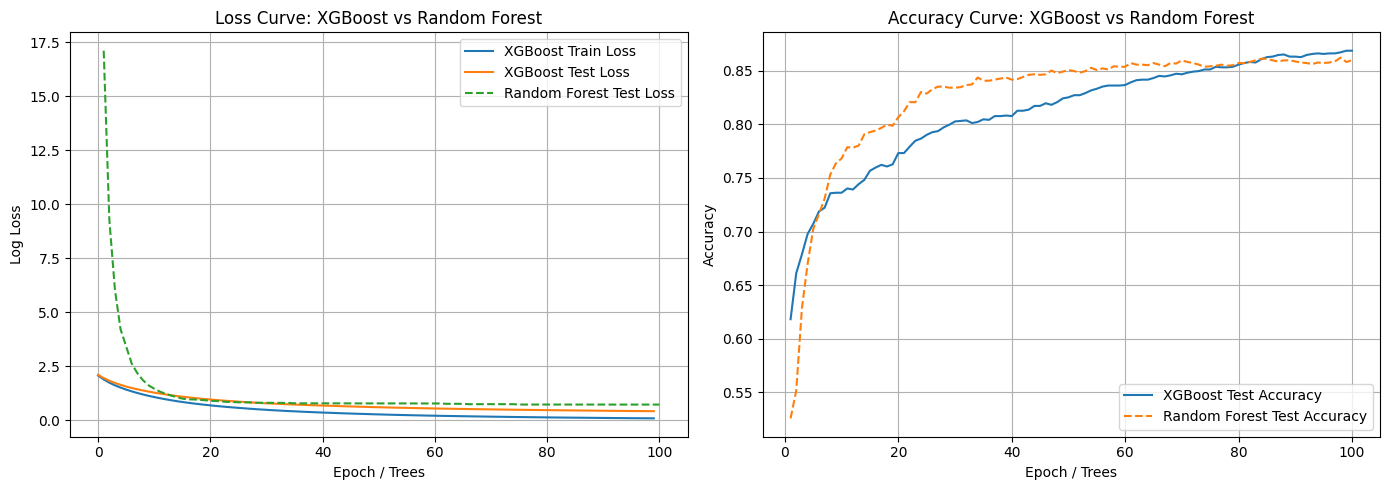

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
import matplotlib.pyplot as plt
import numpy as np

# === XGBoost === #
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'multi:softprob',
    'num_class': len(np.unique(y_train)),
    'max_depth': 6,
    'eta': 0.1,
    'eval_metric': 'mlogloss',
    'seed': 42
}

evals_result = {}

print("\nTraining XGBoost...")
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    evals_result=evals_result,
    verbose_eval=False
)

# Predictions for final epoch
y_pred_proba_xgb = xgb_model.predict(dtest)
y_pred_xgb = np.argmax(y_pred_proba_xgb, axis=1)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("\n📊 XGBoost Accuracy:", acc_xgb)
print("\n📊 :", acc_xgb)
# === Random Forest (Simulated Epochs) === #
print("\nTraining Random Forest incrementally...")
rf_accuracies = []
rf_losses = []

for n_estimators in range(1, 101):
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=None,
        warm_start=True,
        random_state=42
    )
    rf_model.fit(X_train, y_train)

    y_pred_proba_rf = rf_model.predict_proba(X_test)
    y_pred_rf = np.argmax(y_pred_proba_rf, axis=1)

    acc = accuracy_score(y_test, y_pred_rf)
    loss = log_loss(y_test, y_pred_proba_rf)

    rf_accuracies.append(acc)
    rf_losses.append(loss)

# === Plotting === #
epochs = range(1, 101)

plt.figure(figsize=(14, 5))

# XGBoost Loss
plt.subplot(1, 2, 1)
plt.plot(evals_result['train']['mlogloss'], label='XGBoost Train Loss')
plt.plot(evals_result['test']['mlogloss'], label='XGBoost Test Loss')
plt.plot(epochs, rf_losses, label='Random Forest Test Loss', linestyle='--')
plt.xlabel("Epoch / Trees")
plt.ylabel("Log Loss")
plt.title("Loss Curve: XGBoost vs Random Forest")
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
xgb_test_preds = np.argmax(xgb_model.predict(dtest), axis=1)
xgb_acc = [accuracy_score(y_test, np.argmax(xgb_model.predict(xgb.DMatrix(X_test), iteration_range=(0, i+1)), axis=1)) for i in range(100)]
plt.plot(epochs, xgb_acc, label='XGBoost Test Accuracy')
plt.plot(epochs, rf_accuracies, label='Random Forest Test Accuracy', linestyle='--')
plt.xlabel("Epoch / Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve: XGBoost vs Random Forest")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import torch
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim

# Assuming df is already defined and contains the dataset
# Shuffle dataset (optional but good practice)
df = shuffle(df, random_state=42).reset_index(drop=True)

# Display shape and column info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# --- STEP 1: Drop unnecessary columns if any (like filename) ---
if 'filename' in df.columns:
    df = df.drop('filename', axis=1)

# --- STEP 2: Separate features and labels ---
X = df.drop('label', axis=1)  # assuming 'label' is the genre column
y = df['label']

# --- STEP 3: Encode labels to numeric values ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # genres will become integers 0–9

# --- STEP 4: Feature scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- STEP 5: Train/Test Split (80/20) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Long type for classification
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __len__(self):
        return len(self.X_data)

    def __getitem__(self, idx):
        return self.X_data[idx], self.y_data[idx]

# Instantiate the custom dataset
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

# Create DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model definition
class SimpleModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(p=0.3)
        self.batch_norm1 = nn.BatchNorm1d(256)
        self.batch_norm2 = nn.BatchNorm1d(128)

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.batch_norm2(self.fc2(x)))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Hyperparameters
lr = 0.001
epochs = 100
input_dim = X_train.shape[1]  # Number of features in X_train
output_dim = len(le.classes_)  # Number of output classes

# Initialize model, loss function, and optimizer
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleModel(input_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)

# Training loop
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct_preds = 0
    total_preds = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)  # Move data to GPU if available
        optimizer.zero_grad()
        output = model(xb)
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        epoch_loss += loss.item()
        preds = output.argmax(dim=1)
        correct_preds += (preds == yb).sum().item()
        total_preds += yb.size(0)

    # Compute training accuracy for the epoch
    train_loss = epoch_loss / len(train_loader)
    train_accuracy = correct_preds / total_preds

    # Validation accuracy after each epoch
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb).argmax(dim=1)
            all_preds.extend(preds.tolist())
            all_labels.extend(yb.tolist())

    val_accuracy = accuracy_score(all_labels, all_preds)
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f} - Train Accuracy: {train_accuracy:.4f} - Validation Accuracy: {val_accuracy:.4f}")


Shape: (9990, 59)
Columns: ['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']
Epoch 1/100 - Train Loss: 1.4240 - Train Accuracy: 0.5188 - Validati

📌 Hybrid Ensemble Accuracy: 0.9314314314314315
📌 Hybrid Ensemble F1 Score: 0.931479920614035

Classification Report:
               precision    recall  f1-score   support

       blues       0.96      0.94      0.95       200
   classical       0.92      0.96      0.94       199
     country       0.89      0.92      0.91       199
       disco       0.92      0.89      0.90       200
      hiphop       0.99      0.94      0.96       200
        jazz       0.90      0.94      0.92       200
       metal       0.95      0.95      0.95       200
         pop       0.94      0.94      0.94       200
      reggae       0.94      0.95      0.95       200
        rock       0.90      0.89      0.89       200

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998



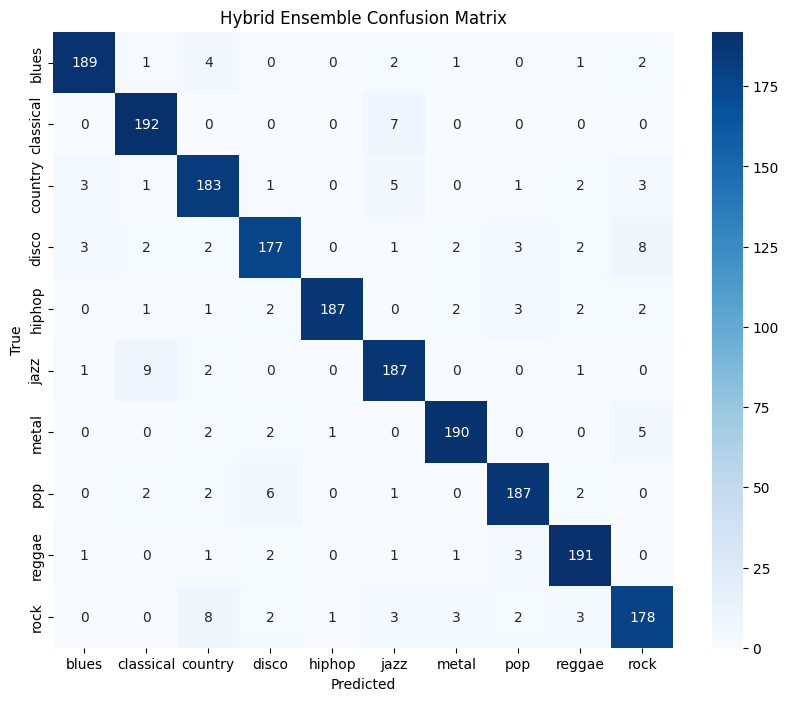

In [ ]:
import numpy as np
import torch
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# --- 1. Collect Predictions from All Models --- #
# Ensure models are in eval mode
model.eval()

# --- PyTorch Model Probabilities --- #
pt_probs = []
with torch.no_grad():
    for xb, _ in test_loader:
        xb = xb.to(device)
        logits = model(xb)
        probs = torch.softmax(logits, dim=1)
        pt_probs.append(probs.cpu().numpy())
pt_probs = np.vstack(pt_probs)  # Shape: [num_samples, num_classes]

# --- XGBoost Probabilities --- #
xgb_probs = xgb_model.predict(dtest)  # Already softmaxed (multi:softprob)

# --- Random Forest Probabilities --- #
rf_probs = rf_model.predict_proba(X_test)  # Already probabilities

# --- 2. Normalize and Weight (optional) --- #
# You can assign different weights if one model performs better
pt_weight = 0.4
xgb_weight = 0.3
rf_weight = 0.3

# --- 3. Soft Voting Ensemble --- #
ensemble_probs = (
    pt_weight * pt_probs +
    xgb_weight * xgb_probs +
    rf_weight * rf_probs
)

# --- 4. Final Predictions --- #
y_pred_ensemble = np.argmax(ensemble_probs, axis=1)

# --- 5. Evaluation --- #
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

print("📌 Hybrid Ensemble Accuracy:", ensemble_acc)
print("📌 Hybrid Ensemble F1 Score:", ensemble_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred_ensemble, target_names=le.classes_))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Hybrid Ensemble Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
